In [2]:
import pandas as pd
import numpy as np
import csv

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

crawling_data = pd.read_csv('./test-1.csv',encoding ='utf-8')

In [3]:
crawling_data

,Unnamed: 0,기업명,Title,Content,c_index,c_name
0,0,(주)엠이유가스,바른미래당 [브리핑] 제207차 최고위원회의 결과브리핑,제207차 최고위원회의 결과브리핑\n(2020.02.21.)\n\n\n▣ 김정화 대...,45,도소매업
1,1,(주)엠이유가스,[양구]민주당 소속 김성순씨 양구군수 출마 선언,【양구】더불어민주당 김성순 (주)엠이유가스 대표이사(사진)가 양구군수 선거 출마를 ...,45,도소매업
2,2,(주)엠이유가스,[양구]김성순 양구군수 예비후보 바른미래당 입당여부 관심,【양구】양구군수 선거 무소속 김성순 예비후보의 바른미래당 입당 여부에 관심이 쏠리고...,45,도소매업
3,3,(주)엠이유가스,[양구]양구군수 선거 민주당 경선 4자 구도,김성순 대표 경쟁 가세\n한국당도 5명 출마 관심\n\n【양구】국내 가스시설 관련 ...,45,도소매업
4,4,(주)엠이유가스,[민주당 도당 지방선거 승리 다짐]“좋은 후보·정책으로 승부”,[민주당 도당 지방선거 승리 다짐]“좋은 후보·정책으로 승부” ◇16일 더불어민주당...,45,도소매업
...,...,...,...,...,...,...
106,104,(주)인사이너리,[4월-1주] 주간 포털 브리핑,이미 발표된 포털업계의 소식들을 모아 한눈에 볼 수 있도록 매주 보여드리고자 합니다...,58,정보통신업
107,105,(주)인사이너리,"동원육영재단, 대학생 전인교육 '자양 라이프 아카데미' 무료 개설",'자양 라이프 아카데미' 1기 대학생 모집.ⓒ동원육영재단\n\n동원그룹이 지난 20...,58,정보통신업
108,106,(주)인우코퍼레이션,"[인사] 수입업협회, 새 집행부 구성",[아시아경제 김대섭 기자] 한국수입업협회(회장 이주태)는 제18대 새 집행부를 구성...,45,도소매업
109,107,(주)인큐블록,"김익환 코인네스트 대표 ""가상통화거래소 역할은 블록체인 알리는 것""",김익환 코인네스트 대표가 23일 서울 신사동에서 열린 '제5회 코인네스트 캠업'에서...,58,정보통신업


In [4]:
texts = crawling_data.get('c_name')
print(texts)

0         도소매업
1         도소매업
2         도소매업
3         도소매업
4         도소매업
        ...   
106      정보통신업
107      정보통신업
108       도소매업
109      정보통신업
110    기기류 제조업
Name: c_name, Length: 111, dtype: object


In [5]:
# 판다스 데이터 리스트로 변환
text_list=[]
for i in texts:
  text_list.append(i)

print(text_list)
print(type(text_list))


['도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '기기류 제조업', '도소매업', '도소매업', '기기류 제조업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '건설업', '도소매업', '건설업', '도소매업', '기기류 제조업', '기기류 제조업', '정보통신업', '정보통신업', '정보통신업', '도소매업', '도소매업', '도소매업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '건설업', '건설업', '건설업', '기기류 제조업', '기기류 제조업', '기기류 제조업', '기기류 제조업', '기기류 제조업', '기기류 제조업', '건설업', '기기류 제조업', '기기류 제조업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '도소매업', '도소매업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '건설업', '건설업', '정보통신업', '건설업', '기기류 제조업', '정보통신업', '도소매업', '도소매업', '정보통신업', '도소매업', '정보통신업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '도소매업', '건설업', '정보통신업', '정보통신업', '기기류 제조업', '도소매업', '도소매업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '정보통신업', '도소매업', '정보통신업', '기기류 제조업']
<class 'list'>


In [6]:
from collections import Counter
count = Counter(text_list)

In [7]:
count

Counter({'도소매업': 36, '기기류 제조업': 15, '정보통신업': 50, '건설업': 10})

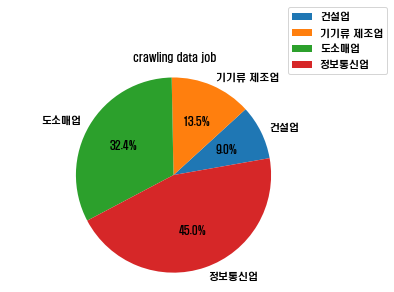

In [38]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm


font_path = r'C:/Windows/Fonts/H2HDRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

ratio = [10, 15, 36, 50]
labels = ['건설업', '기기류 제조업', '도소매업', '정보통신업']

plt.title("crawling data job", size=10)
plt.pie(ratio,labels=labels ,autopct='%.1f%%',startangle=10, counterclock=True,textprops={'size':10})
plt.axis("equal")
plt.legend(loc='upper right',bbox_to_anchor=(1.15, 1.3))
plt.show()